# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [1]:
# Business Understanding - To efficiently and competitively price used cars from a dataset of approximately 420K entries, 
# I will use data analysis tools to identify the most relevant features among the 18 available and select the most effective 
# predictive model for estimating price. Since the goal is to predict a single continuous outcome, and based on the lectures
# and course content up to Module 10, my analysis will focus on regression-based models.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [4]:
# Data Understanding - I will perform the following steps to review the dataset’s columns/features and note any data quality 
# concerns:
# - Identify missing or null values in features
# - Detect and remove duplicate rows
# - Identify and assess outliers
# - Convert data types as needed for analysis
# - Remove irrelevant or redundant features

In [6]:
# Data Analysis - The dataset contains 426,880 entries of used car sales and 18 features describing each car, such as fuel type,
# transmission, and more. Based on my experience and knowledge of the used car market, I anticipate the following features will 
# have the greatest influence on the model:
# - Year
# - Odometer
# - Manufacturer
# - State

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
import math
from sklearn.utils import shuffle
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline


warnings.filterwarnings("ignore")

In [9]:
df = pd.read_csv("https://github.com/vkoul/data/raw/main/misc/vehicles.zip")
num_of_row = df.shape[0]
num_of_col = df.shape[1]

print(f"The number of used car sales/rows is: {num_of_row}")
print(f"The number of features/columns is: {num_of_col}")

The number of used car sales/rows is: 426880
The number of features/columns is: 18


In [10]:
# List 18 columns/features
df.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')

In [14]:
# Display five rows
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [18]:
df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


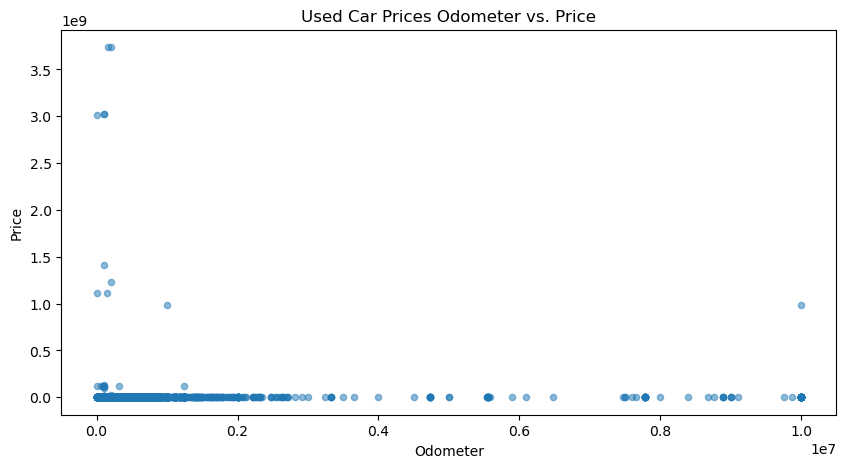

In [20]:
# Plot of used car prices by Odometer
df[["odometer", "price"]].plot(kind="scatter", x="odometer", y="price", alpha=0.5, figsize=(10,5))
plt.title("Used Car Prices Odometer vs. Price")
plt.xlabel("Odometer")
plt.ylabel("Price")
plt.show()
# Analysis: Used car prices sold at a higher value with lower miles


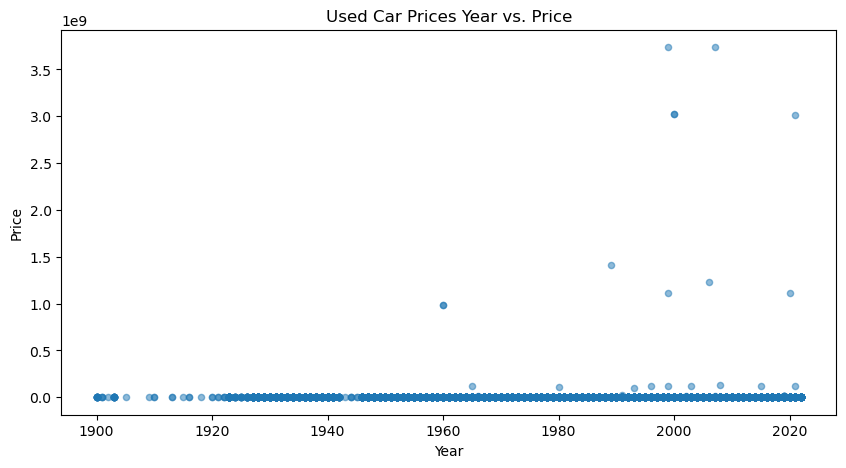

In [21]:
# Plot of used car prices by year
df[["year", "price"]].plot(kind="scatter", x="year", y="price", alpha=0.5, figsize=(10,5))
plt.title("Used Car Prices Year vs. Price")
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()
# Analysis: More used cars were sold that were newer (year)

In [22]:
# List top states selling used cars
df['state'].value_counts().head(15)

state
ca    50614
fl    28511
tx    22945
ny    19386
oh    17696
or    17104
mi    16900
nc    15277
wa    13861
pa    13753
wi    11398
co    11088
tn    11066
va    10732
il    10387
Name: count, dtype: int64

In [24]:
# Calculate top state selling used cars
ca_percent = df[df["state"] == "ca"].shape[0] / df.shape[0]
print(f"California car sales account for {ca_percent:.2%} of the dataset")

California car sales account for 11.86% of the dataset


In [25]:
# List top used car selling manufacturer
df["manufacturer"].value_counts().head(15)

manufacturer
ford             70985
chevrolet        55064
toyota           34202
honda            21269
nissan           19067
jeep             19014
ram              18342
gmc              16785
bmw              14699
dodge            13707
mercedes-benz    11817
hyundai          10338
subaru            9495
volkswagen        9345
kia               8457
Name: count, dtype: int64

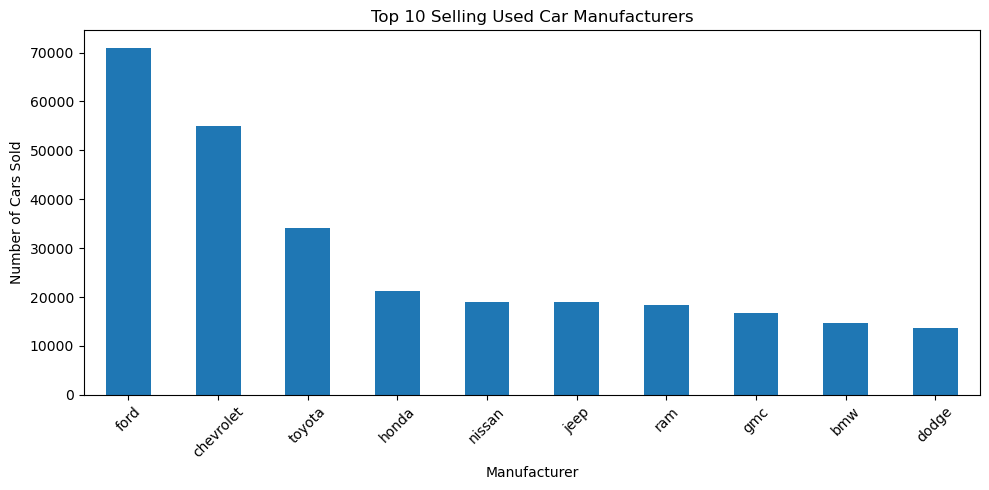

In [28]:
# Plot of the top ten used car selling manufacturer
top_manufacturers = df["manufacturer"].value_counts().head(10)
plt.figure(figsize=(10,5))
top_manufacturers.plot(kind="bar")
plt.title("Top 10 Selling Used Car Manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Number of Cars Sold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Analysis: Ford manufacturer top selling used cars

In [31]:
# Plot used car sales by year
df["year"].value_counts()

year
2017.0    36420
2018.0    36369
2015.0    31538
2013.0    30794
2016.0    30434
          ...  
1943.0        1
1915.0        1
1902.0        1
1905.0        1
1909.0        1
Name: count, Length: 114, dtype: int64

<Axes: title={'center': 'Used Car Sales By Year'}, xlabel='year'>

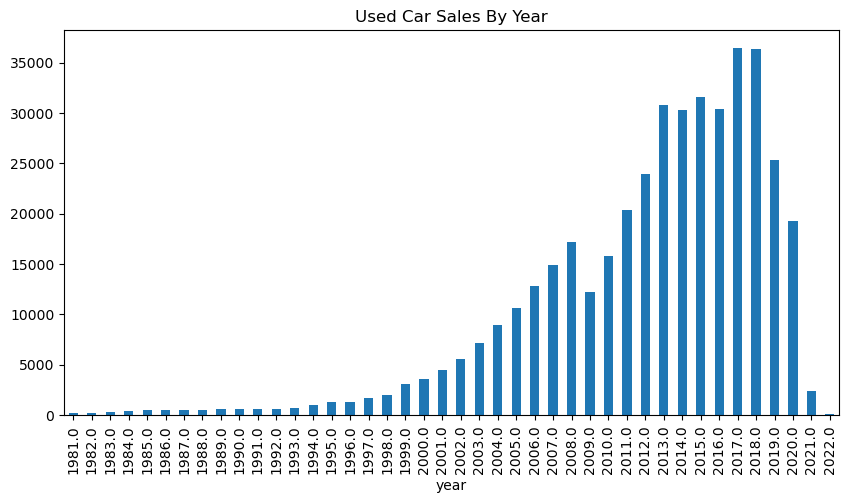

In [34]:
# Plot used car sales by year
sales_by_year = df["year"].value_counts().sort_index()
sales_by_year = sales_by_year[sales_by_year.index > 1980]
sales_by_year.plot(
    kind='bar', 
    figsize=(10,5), 
    title="Used Car Sales By Year", 
    rot=90
)

In [35]:
temp = (df['price'] == 0).sum()
print(f"Total of used cars with a price of $0: {temp}")

Total of used cars with a price of $0: 32895


In [38]:
temp = (df['price'] < 100).sum()
print(f"Total of used cars with a price less than $100: {temp}")

Total of used cars with a price less than $100: 36222


In [40]:
temp = (df['price'] < 1000).sum()
print(f"Total of used cars with a price less than $1000: {temp}")

Total of used cars with a price less than $1000: 46315


In [42]:
df_mean = df['price'].mean()
print(f"The mean used car price is ${df_mean:.2f}")

The mean used car price is $75199.03


In [44]:
df_std = df['price'].std()
print(f"The standard deviation of used cars prices is ${df_std:.2f}")

The standard deviation of used cars prices is $12182282.17


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [47]:
# Identify null or missing values and sort by highest
df.isnull().sum().sort_values(ascending=False).head(len(df.columns))

size            306361
cylinders       177678
condition       174104
VIN             161042
drive           130567
paint_color     130203
type             92858
manufacturer     17646
title_status      8242
model             5277
odometer          4400
fuel              3013
transmission      2556
year              1205
id                   0
region               0
price                0
state                0
dtype: int64

In [49]:
# Remove columns/features that are less relevant

In [51]:
# Drop features from dataframe
df.drop(["id", "region", "VIN", "cylinders","paint_color", "drive", "model","condition", "size", "condition", "type"], axis=1, inplace=True)

In [53]:
# Identify null or missing values and sort by highest
df.isnull().sum().sort_values(ascending=False).head(len(df.columns))

manufacturer    17646
title_status     8242
odometer         4400
fuel             3013
transmission     2556
year             1205
price               0
state               0
dtype: int64

In [55]:
# Remove missing key missing value records
df.dropna(subset=["manufacturer"], inplace=True)
df.dropna(subset=["odometer"], inplace=True)
df.dropna(subset=["year"], inplace=True)

In [57]:
# Remove used car sales less than 500
df.drop(df[df["price"] < 2500].index, inplace=True)
df.drop(df[df["price"] > 150000].index, inplace=True)
print(f"Number of rows after: {df.shape[0]}")

Number of rows after: 353622


In [59]:
# Remove used car sales older than 1980 and newer than 2019
df.query("year > 1980", inplace=True)
df.query("year < 2020", inplace=True)
print(f"Number of rows after: {df.shape[0]}")

Number of rows after: 329018


In [61]:
# Remove used car sales with odometer greater than 250K (miles)
df.query('odometer <= 400000', inplace=True)
df["odometer"] = df["odometer"].astype(int)
print(f"Number of rows after: {df.shape[0]}")

Number of rows after: 328503


In [63]:
# Keep only title status which are clean, this may help with outliers, then drop title staus
df.query('title_status == "clean"', inplace=True)
df.drop("title_status", axis=1, inplace=True)

In [65]:
df.isnull().sum().sort_values(ascending=False).head(len(df.columns))

fuel            1389
transmission    1333
price              0
year               0
manufacturer       0
odometer           0
state              0
dtype: int64

In [67]:
# Create age of used car sale, assume 2025 as base
df["age"] = 2020 - df["year"]
df["age"] = df["age"].astype(int)
df.head(100)

,price,year,manufacturer,fuel,odometer,transmission,state,age
27,33590,2014.0,gmc,gas,57923,other,al,6
28,22590,2010.0,chevrolet,gas,71229,other,al,10
30,30990,2017.0,toyota,gas,41124,other,al,3
31,15000,2013.0,ford,gas,128000,automatic,al,7
32,27990,2012.0,gmc,gas,68696,other,al,8
...,...,...,...,...,...,...,...,...
147,14590,2012.0,bmw,other,80465,other,al,8
148,20590,2018.0,chrysler,gas,71021,other,al,2
150,10990,2013.0,nissan,gas,81557,other,al,7
151,26990,2018.0,gmc,gas,26514,other,al,2


In [69]:
# Drop features from dataframe
df.drop(["year"], axis=1, inplace=True)

In [71]:
# Learn about 'transmission'
print(df["transmission"].value_counts().sort_index())

# I will drop the transmission feature since I don't know what 'other' is.
df.drop(["transmission"], axis=1, inplace=True)

transmission
automatic    246921
manual        15484
other         48330
Name: count, dtype: int64


In [73]:
# Learn about 'fuel'
print(df["fuel"].value_counts().sort_index())

# I will drop the fuel feature since I don't know what 'other' is.
df.drop(["fuel"], axis=1, inplace=True)


fuel
diesel       20144
electric      1299
gas         261877
hybrid        4198
other        23161
Name: count, dtype: int64


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 312068 entries, 27 to 426879
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   price         312068 non-null  int64 
 1   manufacturer  312068 non-null  object
 2   odometer      312068 non-null  int32 
 3   state         312068 non-null  object
 4   age           312068 non-null  int32 
dtypes: int32(2), int64(1), object(2)
memory usage: 11.9+ MB


In [77]:
df.head(10)

,price,manufacturer,odometer,state,age
27,33590,gmc,57923,al,6
28,22590,chevrolet,71229,al,10
30,30990,toyota,41124,al,3
31,15000,ford,128000,al,7
32,27990,gmc,68696,al,8
33,34590,chevrolet,29499,al,4
34,35000,toyota,43000,al,1
35,29990,chevrolet,17302,al,4
36,38590,chevrolet,30237,al,9
37,4500,jeep,192000,al,28


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [80]:
# create backup
df2 = df.copy()

In [82]:
# * * * * * * * * * * * * * * * * * * * * * * *
# Simple Linear Regression - one feature "age"
# * * * * * * * * * * * * * * * * * * * * * * *
features = df[["age"]]
price = df["price"]
f = linear_model.LinearRegression()
f.fit(features, price)
temp10 = f.predict([[10]])
temp20 = f.predict([[20]])
print(f"The predicted price of a 10-year old used car is: $ {temp10[0]:.2f}")
print(f"The predicted price of a 20-year old used car is: $ {temp20[0]:.2f}")
df["p1"] = f.predict(features)
df["p1"] = df["p1"].astype(int)

The predicted price of a 10-year old used car is: $ 16753.17
The predicted price of a 20-year old used car is: $ 4546.49


In [84]:
# MSE - very high
mse1 = mean_squared_error(df["p1"], df["price"])
print("Mean Squared Error P1:", int(mse1))

Mean Squared Error P1: 130814787


In [86]:
# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
# Multiple Linear Regression - two features "age" and "odometer"
# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
features = df[["age", "odometer"]]
f2 = linear_model.LinearRegression()
f2.fit(features, df["price"])
df["p2"] = f2.predict(features)
df["p2"] = df["p2"].astype(int)

In [88]:
mse2 = mean_squared_error(df["p2"], df["price"])
print("Mean Squared Error P1:", int(mse1))
print("Mean Squared Error P2:", int(mse2))

Mean Squared Error P1: 130814787
Mean Squared Error P2: 116450152


In [90]:
df.head(5)

,price,manufacturer,odometer,state,age,p1,p2
27,33590,gmc,57923,al,6,21635,23622
28,22590,chevrolet,71229,al,10,16753,19404
30,30990,toyota,41124,al,3,25297,27293
31,15000,ford,128000,al,7,20415,17593
32,27990,gmc,68696,al,8,19194,21206


In [92]:
df["state_popular"] = 0

temp = df["state"].value_counts()[df["state"].value_counts() > 10000].index
df.loc[df["state"].isin(temp), "state_popular"] = 1

temp = df["state"].value_counts()[df["state"].value_counts() > 20000].index
df.loc[df["state"].isin(temp), "state_popular"] = 2

temp = df["state"].value_counts()[df["state"].value_counts() > 30000].index
df.loc[df["state"].isin(temp), "state_popular"] = 3

df.drop(["state"], axis=1, inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 312068 entries, 27 to 426879
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   price          312068 non-null  int64 
 1   manufacturer   312068 non-null  object
 2   odometer       312068 non-null  int32 
 3   age            312068 non-null  int32 
 4   p1             312068 non-null  int32 
 5   p2             312068 non-null  int32 
 6   state_popular  312068 non-null  int64 
dtypes: int32(4), int64(2), object(1)
memory usage: 14.3+ MB


In [94]:
df["manuf_popular"] = 0

temp = df["manufacturer"].value_counts()[df["manufacturer"].value_counts() > 10000].index
df.loc[df["manufacturer"].isin(temp), "manuf_popular"] = 1

temp = df["manufacturer"].value_counts()[df["manufacturer"].value_counts() > 20000].index
df.loc[df["manufacturer"].isin(temp), "manuf_popular"] = 2

temp = df["manufacturer"].value_counts()[df["manufacturer"].value_counts() > 30000].index
df.loc[df["manufacturer"].isin(temp), "manuf_popular"] = 3

temp = df["manufacturer"].value_counts()[df["manufacturer"].value_counts() > 40000].index
df.loc[df["manufacturer"].isin(temp), "manuf_popular"] = 4

temp = df["manufacturer"].value_counts()[df["manufacturer"].value_counts() > 50000].index
df.loc[df["manufacturer"].isin(temp), "manuf_popular"] = 5

df.drop(["manufacturer"], axis=1, inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 312068 entries, 27 to 426879
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   price          312068 non-null  int64
 1   odometer       312068 non-null  int32
 2   age            312068 non-null  int32
 3   p1             312068 non-null  int32
 4   p2             312068 non-null  int32
 5   state_popular  312068 non-null  int64
 6   manuf_popular  312068 non-null  int64
dtypes: int32(4), int64(3)
memory usage: 14.3 MB


In [95]:
df3 = df.copy()

In [98]:
# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
# Multiple Linear Regression - four features
# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
features = df[["age", "odometer", "state_popular", "manuf_popular"]]
f3 = linear_model.LinearRegression()
f3.fit(features, df["price"])
df["p3"] = f3.predict(features)
df["p3"] = df["p3"].astype(int)
df.head(5)

,price,odometer,age,p1,p2,state_popular,manuf_popular,p3
27,33590,57923,6,21635,23622,0,1,23003
28,22590,71229,10,16753,19404,0,4,22039
30,30990,41124,3,25297,27293,0,2,27837
31,15000,128000,7,20415,17593,0,5,21074
32,27990,68696,8,19194,21206,0,1,20547


In [100]:
mse3 = mean_squared_error(df["p3"], df["price"])
print("Mean Squared Error P1:", int(mse1))
print("Mean Squared Error P2:", int(mse2))
print("Mean Squared Error P3:", int(mse3))

Mean Squared Error P1: 130814787
Mean Squared Error P2: 116450152
Mean Squared Error P3: 111999768


In [102]:
# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
# Multiple Linear Regression - 5 features
# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
df["age2"] = df["age"] **2
features = df[["age", "odometer", "state_popular", "manuf_popular", "age2"]]
f4 = linear_model.LinearRegression()
f4.fit(features, df["price"])
df["p4"] = f4.predict(features)
df["p4"] = df["p4"].astype(int)
df.head(5)

,price,odometer,age,p1,p2,state_popular,manuf_popular,p3,age2,p4
27,33590,57923,6,21635,23622,0,1,23003,36,21537
28,22590,71229,10,16753,19404,0,4,22039,100,18212
30,30990,41124,3,25297,27293,0,2,27837,9,28790
31,15000,128000,7,20415,17593,0,5,21074,49,20492
32,27990,68696,8,19194,21206,0,1,20547,64,17935


In [104]:
mse4 = mean_squared_error(df["p4"], df["price"])
print("Mean Squared Error P1:", int(mse1))
print("Mean Squared Error P2:", int(mse2))
print("Mean Squared Error P3:", int(mse3))
print("Mean Squared Error P4:", int(mse4))

Mean Squared Error P1: 130814787
Mean Squared Error P2: 116450152
Mean Squared Error P3: 111999768
Mean Squared Error P4: 103564537


In [106]:
# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
# Multiple Linear Regression - Pipeline
# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
#df.drop(["age2"], axis=1, inplace=True)

df = df2.copy()

pipeline_model = Pipeline([
    ('transform', PolynomialFeatures(degree=5, include_bias=False)), 
    ('regression', LinearRegression())
])

p5 = pipeline_model.fit(df[["age"]], df["price"])
df["p5"] = p5.predict(df[["age"]])
df.head(5)

mse5 = mean_squared_error(df["p5"], df["price"])
print("Mean Squared Error P1:", int(mse1))
print("Mean Squared Error P2:", int(mse2))
print("Mean Squared Error P3:", int(mse3))
print("Mean Squared Error P4:", int(mse4))
print("Mean Squared Error P5:", int(mse5))



Mean Squared Error P1: 130814787
Mean Squared Error P2: 116450152
Mean Squared Error P3: 111999768
Mean Squared Error P4: 103564537
Mean Squared Error P5: 109310622


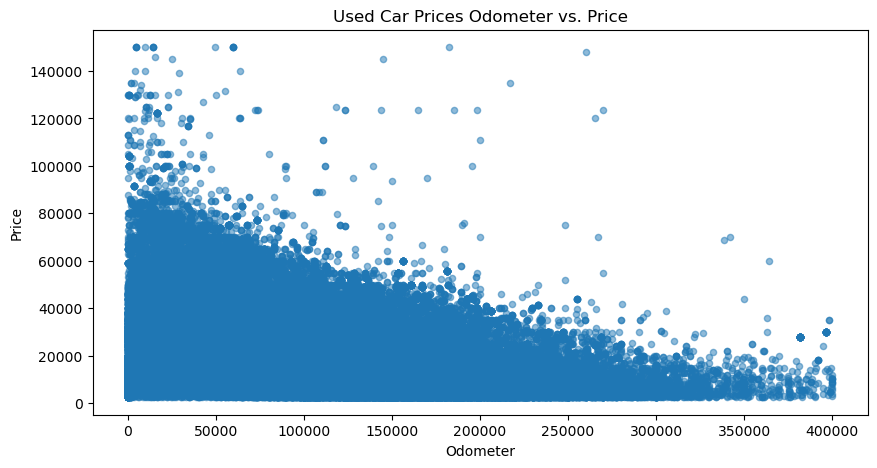

,price,manufacturer,odometer,state,age,p5
27,33590,gmc,57923,al,6,19850.592731
28,22590,chevrolet,71229,al,10,12001.930155
30,30990,toyota,41124,al,3,28225.444654
31,15000,ford,128000,al,7,17492.178176
32,27990,gmc,68696,al,8,15391.209770


In [108]:
df[["odometer", "price"]].plot(kind="scatter", x="odometer", y="price", alpha=0.5, figsize=(10,5))
plt.title("Used Car Prices Odometer vs. Price")
plt.xlabel("Odometer")
plt.ylabel("Price")
plt.show()
df.head()

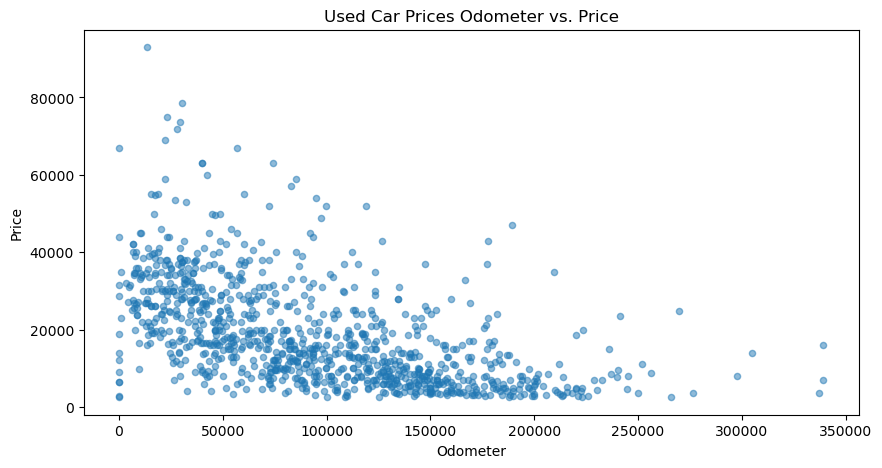

,price,manufacturer,odometer,state,age,p5
27,33590,gmc,57923,al,6,19850.592731
28,22590,chevrolet,71229,al,10,12001.930155
30,30990,toyota,41124,al,3,28225.444654
31,15000,ford,128000,al,7,17492.178176
32,27990,gmc,68696,al,8,15391.209770


In [109]:
df_sample = df.sample(1000)
df_sample[["odometer", "price"]].plot(kind="scatter", x="odometer", y="price", alpha=0.5, figsize=(10,5))
plt.title("Used Car Prices Odometer vs. Price")
plt.xlabel("Odometer")
plt.ylabel("Price")
plt.show()
df.head()

In [110]:
def get_mse_by_k(k):
    pipeline_model = Pipeline([
    ('transform', PolynomialFeatures(degree=k)), 
    ('regression', LinearRegression())
    ])
    pipeline_model.fit(df_sample[["age"]], df_sample["price"])
    return mean_squared_error(pipeline_model.predict(df_sample[["age"]]), df_sample["price"])

ks = np.array(range(0,10))
mses = [get_mse_by_k(k) for k in ks]
mses_and_k = pd.DataFrame({"k": ks, "MSE": mses})


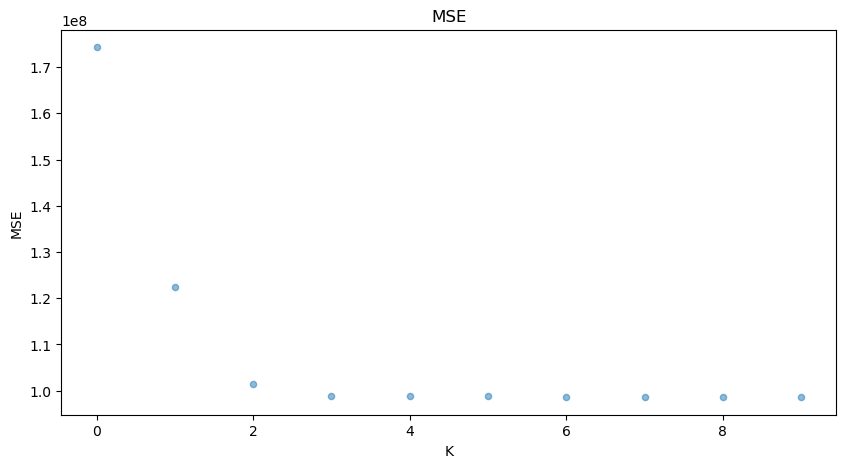

In [111]:
mses_and_k[["k", "MSE"]].plot(kind="scatter", x="k", y="MSE", alpha=0.5, figsize=(10,5))
plt.title("MSE")
plt.xlabel("K")
plt.ylabel("MSE")
plt.show()

In [113]:
df3.drop(["p1","p2","state_popular","manuf_popular"], axis=1, inplace=True)
df3

,price,odometer,age
27,33590,57923,6
28,22590,71229,10
30,30990,41124,3
31,15000,128000,7
32,27990,68696,8
...,...,...,...
426873,30990,15080,2
426874,33590,30814,2
426875,23590,32226,1
426878,28990,30112,2


In [116]:
# Attempt to Standardize the data in the dataframe

scaled_ridge_model = Pipeline([
    ('transform', PolynomialFeatures(degree=3, include_bias = False)), 
    ('scale', StandardScaler()),
    ('regression', Ridge(alpha = 25))
    ])

p6 = scaled_ridge_model.fit(df3[["age","odometer"]], df3["price"])
df3["p6"] = p6.predict(df3[["age","odometer"]])

mse6 = mean_squared_error(df3["p6"], df["price"])
print("Mean Squared Error P1:", int(mse1))
print("Mean Squared Error P2:", int(mse2))
print("Mean Squared Error P3:", int(mse3))
print("Mean Squared Error P4:", int(mse4))
print("Mean Squared Error P5:", int(mse5))
print("Mean Squared Error P6:", int(mse6))


Mean Squared Error P1: 130814787
Mean Squared Error P2: 116450152
Mean Squared Error P3: 111999768
Mean Squared Error P4: 103564537
Mean Squared Error P5: 109310622
Mean Squared Error P6: 104337612


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [121]:
# After completing Practical Application 2, I developed six models, progressing from a single feature to multiple features. 
# In retrospect, the maximum number of features I incorporated was seven. I would like to investigate the impact on MSE 
# when using a larger set of features.

# For instance, while analyzing the manufacturer variable, I identified over forty unique values. Rather than 
# creating one hot encoding for each category, I opted to assign a single popular variable, similar to the lecture 
# example where day of the week was converted into binary form. I would apply a similar approach to the state 
# variable in future iterations.

# I was somewhat disappointed by the high MSE values produced by my models. Because vehicle prices are measured 
# in the thousands, and the models were not well fitted, squaring the residuals resulted in very large error values. 
# This reinforces my belief that incorporating additional features or segmenting the dataset by manufacturer could 
# improve model performance.

# A significant portion of my time was dedicated to data cleaning and preparation. I filtered the dataset to include 
# vehicles priced between two thousand five hundred and one hundred fifty thousand dollars, which helped remove salvage 
# vehicles and extreme outliers. Additionally, I limited the model to cars manufactured between 1980 and 2020 to 
# exclude the period impacted by COVID related disruptions in vehicle sales.

# Ultimately, I reduced the dataset to four key variables: year or age, odometer, manufacturer, and price. However,
# I suspect that these features alone were insufficient to accurately predict prices or achieve a satisfactory MSE.

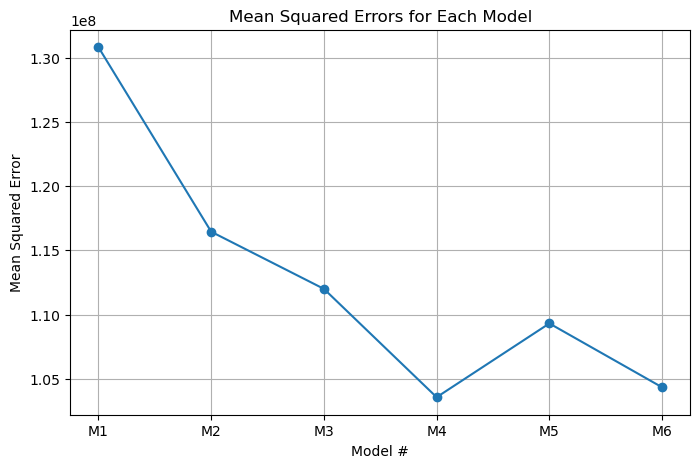

In [123]:
# Data
m = ['M1', 'M2', 'M3', 'M4', 'M5', 'M6']
mse_values = [130814787, 116450152, 111999768, 103564537, 109310622, 104337612]

# Plot
plt.figure(figsize=(8, 5))
plt.plot(m, mse_values, marker='o', linestyle='-')
plt.title('Mean Squared Errors for Each Model')
plt.xlabel('Model #')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

In [126]:
# To effectively and efficiently predict the prices of used car sales, I recommend that the dataset undergo further review and refinement. 
# Notably, 14 of the 18 features contained substantial missing values. For future efforts, providing a more complete dataset is 
# strongly advised to improve model performance and reliability.
# After developing six models and progressively reducing the mean squared error (MSE) with each iteration, I am confident that a 
# more refined dataset would enable continued improvement in prediction accuracy.
# Additionally, I recommend segmenting the model by manufacturer. This approach would help mitigate the impact of outliers, as 
# the current dataset includes prices ranging from zero to over one million. The most influential features in predicting price
# were year/age, odometer, manufacturer, and state.